## Utility functions and general imports

In [1]:
import h5py
import numpy as np
import scipy as scpy
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from scipy import optimize as opt
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from scipy import sparse

from sklearn.linear_model import SGDClassifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline


In [20]:
# Defining utility functions for reading images and data in
def show_image(array, label):
    im = Image.fromarray(array)
    print("Item of label={}".format(label))
    return(imshow(im))

def construct_conf_mat(actual_y, predicted_prob, pos_class_label, thresh=0.5):
    fp, tp, fn, tn = 0, 0, 0, 0
    for i in range(actual_y.shape[0]):
        if predicted_prob[i] >= thresh:
            if actual_y[i] == pos_class_label:
                tp += 1
            else:
                fp += 1
        else:
            if actual_y[i] == pos_class_label:
                fn += 1
            else:
                tn += 1
    return fp, tp, fn, tn


def create_multiclass_c(X_mat, n, max_iter, y_mat):

    theta = np.zeros((k,n))
    
    for i in range(k):
        label_class = i if i else 0
        print('Class {} being optimised'.format(i))
        #cost0 = cost(theta, X, (y==label_class.flatten()))
        #cost[i] = cost(theta[i], X,y)
        #print('Cost for Class {}:'.format(cost[i]))
        theta[i] = opt.fmin_cg(f = costFunctionReg, x0 = theta[i].flatten(),  fprime = gradRegularization, args = (X_mat,(y_mat == label_class).flatten(), lmbda), maxiter = max_iter, disp = True)            

    return (theta)    
    
    
def compress_project(percent, data_to_compress):

# Find the principal components that explain 99% of the data
    pca = decomposition.PCA(percent)

    #Run PCA on normalized image data
    lower_dim_data = pca.fit_transform(data_to_compress)    
    print('Shape of lower dimension image {}:'.format(lower_dim_data.shape))

    #Project lower dimension data onto original features
    approximation = pca.inverse_transform(lower_dim_data)
    #approximation = pca.inverse_transform(lower_dim_data)
        
    #Reshape approximation and X_norm to 784*28*28 to display images
    approximation_reshaped = approximation.reshape(-1,784)
    print('Shape of reconstructed image {}:'.format(approximation_reshaped.shape))   
    print( 'Is Original close to Resized? ', np.allclose(data_to_compress, approximation) )
    
    return (approximation, lower_dim_data) 


def shape_matrix_process(split_percent):
    
            
        # Read the source files in
        data, label, test_data, test_label = read_data_in(desktop_or_laptop='d')

        # Creating a fair split of training and validation data for the 
        # training model to be trained on
        indices = range(data.shape[0])
        
        training_records = int(split_percent * data.shape[0])        
        
        # Get the records that are part of the indices declared above
        train_data = data[:training_records]
        validate_data = data[training_records:]        
        
        # Get the labels that are part of the indices declared above
        label_train = label[:training_records]
        label_validate = label[training_records:]        

        X_train = train_data.reshape(-1, 784)
        X_validate = validate_data.reshape(-1, 784)
        
        y_train = np.ravel(label_train)
        y_validate = np.ravel(label_validate)    

                
        ##########################################################################  
        # MINMAXSCALER IS THE ONLY SCALER FOUND TO RELIABLY RESULT IN CONVERGENCE*
        # HOWEVER NEEDS FURTHER TESTING =========================================#
        ##########################################################################

        #X_train = preprocessing.scale(X_train)
        min_max_scaler = MinMaxScaler()
        X_train = min_max_scaler.fit_transform(X_train,y_train)
        X_train = X_train.astype('float32')
        X_validate = min_max_scaler.transform(X_validate)
        X_validate = X_validate.astype('float32')
        
        #scaler = preprocessing.StandardScaler().fit(X_train)
        #X_train = scaler.transform(X_train)
        #X_validate = scaler.transform(X_validate)
        
        #transformer = Normalizer().fit(X_train)
        #transformer.transform(X_train)
        
        
        print('Total number of records in X train: {}'.format(X_train.shape[0]))
        print('Total number of records in y train: {}'.format(y_train.shape[0]))
        print('Total number of features in X train: {}'.format(X_train.shape[1]))

        print('Total number of records in X train (valdation set): {}'.format(X_validate.shape[0]))
        print('Total number of features in X train (validation set): {}'.format(X_validate.shape[1]))
        
       
        ########################
        # Now to transform test#
        ########################
        
        X_test = test_data[:2000]        
        X_test = test_data.reshape(-1,784)
        y_test = test_label [:2000]       
        X_test = X_test.astype('float32')
        #y_test = np.ravel(y_test)
        
        
        ##########################################################################  
        # MINMAXSCALER IS THE ONLY SCALER FOUND TO RELIABLY RESULT IN CONVERGENCE*
        # HOWEVER NEEDS FURTHER TESTING =========================================#
        ##########################################################################

        
        #min_max_scaler = preprocessing.MinMaxScaler()    
        #X_test = min_max_scaler.fit_transform(X_test)
        X_test = min_max_scaler.transform(X_test)
                                          
        print('Total number of records in X test: {}'.format(X_test.shape[0]))
        print('Total number of features in X test: {}'.format(X_test.shape[1]))
        
        return(X_train,X_validate,X_test,y_train,y_validate,y_test)
    
    
# Import the files in from python h5 format


def read_data_in(desktop_or_laptop='d'):
    
    if desktop_or_laptop == 'l':

        ## Dan's Mac folder location - NEEDS CHANGING
        with h5py.File('../Project1/data/images_training.h5','r') as H:
            data = np.copy(H['data'])
        with h5py.File('../Project1/data/labels_training.h5','r') as H:
            label = np.copy(H['label'])

        with h5py.File('../Project1/data/images_testing.h5','r') as H:
            data_test = np.copy(H['data'])
        with h5py.File('../Project1/data/labels_testing_2000.h5','r') as H:
            label_test = np.copy(H['label'])    


    else:
        ## Dan's desktop folder location - NEEDS CHANGING
        with h5py.File('../../Input/images_training.h5','r') as H:
            data = np.copy(H['data'])
        with h5py.File('../../Input/labels_training.h5','r') as H:
            label = np.copy(H['label'])
        with h5py.File('../../Input/images_testing.h5','r') as H:
            data_test = np.copy(H['data'])

        with h5py.File('../../Input/labels_testing_2000.h5','r') as H:
            label_test = np.copy(H['label'])     
    
    return(data, label, data_test, label_test)

def add_intercept(X_mat,y_mat):
    m = len(y_mat)
    ones = np.ones((m,1))
    
    X = np.concatenate((ones,X_mat),axis=1)
    m,n = X.shape
    print(X.shape)
    return(X,n)

# Is the matrix symmetric?
def is_symmetric(X, tolerance = 1e-9):
    return(np.allclose(X,X.T, atol=tolerance))


def is_sparse(X,m,n):    

    return    

In [ ]:
class LogisticRegression:
    def __init__(self,  max_iter, intercept, k, lmbda ):
        #self.lr = lr
        self.max_iter = max_iter
        self.intercept = intercept
        self.k = k
        self.lmbda = lmbda
        print ("Logistic Regression model initialised with Max iterations = {} K (classes) = {}  lmbda (Regularisation parameter) ={}".format(self.max_iter,self.k, self.lmbda))
    
    def add_intercept(self, X_mat,y_mat):
        m = len(y_mat)
        ones = np.ones((m,1))

        X_mat = np.concatenate((ones,X_mat),axis=1)
        m_shape,n_shape = X_mat.shape
        #print("n_shape: {}".format(n_shape))
        #print("X_mat.shape: {}".format(X_mat.shape))
        
        return(X_mat,n_shape)
    
    # Defining the sigmoid function required in LR
    def __sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def __cost(self, theta, X_arr, y_arr):
        predictions = self.__sigmoid(X_arr @ theta)
        predictions[predictions == 1] = 0.999 # log(1)=0 causes error in division
        error = -y_arr * np.log(predictions) - (1 - y_arr) * np.log(1 - predictions);
        return sum(error) / len(y_arr);
    
    # Vectorised cost function
    def __costFunctionReg(self,theta, X, y, lmbda):
        m = len(y)
        temp1 = np.multiply(y, np.log(self.__sigmoid(np.dot(X, theta))))
        temp2 = np.multiply(1-y, np.log(1-self.__sigmoid(np.dot(X, theta))))  
        #print(np.sum(temp1 + temp2) / (-m) + np.sum(theta[1:]**2) * lmbda / (2*m))
        return np.sum(temp1 + temp2) / (-m) + np.sum(theta[1:]**2) * lmbda / (2*m)
    
    
    def fit(self, X_mat,max_iter, y_mat,n):
                        
        theta = np.zeros((k,n)) #inital parameters
        cost_values = {}
        
        print("############################################")
        print("### Gradient Descent Optimisation beginning")
        print("############################################")
        for i in range(k):
            label_class = i if i else 0
            print('Class {} being optimised'.format(i))
            #cost0 = cost(theta, X, (y==label_class.flatten()))
            #cost[i] = cost(theta[i], X,y)
            #print('Cost for Class {}:'.format(cost[i]))            
            theta[i] = opt.fmin_cg(f = self.__costFunctionReg, x0 = theta[i].flatten(),  fprime = self.__gradient_reg_vectorised, args = (X_mat,(y_mat == label_class).flatten(), self.lmbda),maxiter= max_iter, disp = True)            
            #cost = {i,}
            #theta[i] = opt.fmin_cg(f = costFunctionReg, x0 = theta[i].flatten(),  fprime = gradRegularization, args = (X_mat,(y == label_class).flatten(), lmbda), maxiter = 200, disp = True)    
            
        print("###########################################")
        print("### Gradient Descent Optimisation finished")
        print("###########################################")
        return (theta)    
    
      
    
    # Vectorised gradient
    def __gradient_reg_vectorised(self, theta, X_arr, y_arr, lmbda):
        m = len(y_arr)
        temp = self.__sigmoid(np.dot(X_arr, theta)) - y_arr
        temp = np.dot(temp.T, X_arr).T / m + theta * lmbda / m
        temp[0] = temp[0] - theta[0] * lmbda / m
        return temp
    
    # Vectorised cost function
    def __cost_func_vectorised(self,theta, X_arr, y_arr, lmbda):
        m = len(y_arr)
        temp_weight1 = np.multiply(y_arr, np.log(self.__sigmoid(np.dot(X_arr, theta))))
        temp_weight2 = np.multiply(1-y_arr, np.log(1-self.__sigmoid(np.dot(X_arr, theta))))
        return np.sum(temp_weight1 + temp_weight2) / (-m) + np.sum(theta[1:]**2) * self.lmbda / (2*m)
    
    
    def predict(self,X,y,theta):    
        preds = []
        preds = np.argmax(X @ theta.T, axis = 1)
        preds = [e if e else 0 for e in preds]
        average_pred = np.mean(preds == y.flatten()) * 100        
        return(preds, average_pred)
        #return(average_pred)
    
    def predict_prob(self,X):
        return (self.__sigmoid(np.dot(X),self.theta.T))
    
        

## For reference: https://github.com/zalandoresearch/fashion-mnist



| Label | Description   |
|------|------|
|   0  | T-shirt/top|
|   1  | Trouser|
|   2  | Pullover|
|   3  | Dress|
|   4  | Coat|
|   5  | Sandal|
|   6  | Shirt|
|   7  | Sneaker|
|   8  | Bag|
|   9  | Ankle boot|

In [ ]:
data, label, data_test, label_test = read_data_in(desktop_or_laptop='d')


#train_data = data[:30000]

#X_train = train_data.reshape(-1, 784)


#X_train,X_validate,X_test,y_train,y_validate,y_test = shape_matrix_process(split_percent=0.8)
#X_test = X_test[:2000]

#def is_symmetric(X, tolerance = 1e-9):
#    return(np.allclose(X,X.T, atol=tolerance))


#sparse.csc_matrix.getnnz(X_train[0])


# Read the source files in
data, label, test_data, test_label = read_data_in(desktop_or_laptop='d')

data.

#is_symmetric(X_train[1])


#= data.reshape[-1,784]
#is_sparse(X_train,X_train.shape[0],X_train.shape[1])
#X.shape
#scpy.sparse.isspmatrix(train_data)

#X_train.shape
#data.reshape[-1,784]
#data[3]

In [ ]:
i = 10
#show_image(data[i],label[i])

#print('Total training data shape : ', data.shape, label.shape)
#data_train = data_train / 255


_, axarr = plt.subplots(10,10,figsize=(10,10))

for i in range(10):
    for j in range(10):
       axarr[i,j].imshow(data[np.random.randint(data.shape[0])].\
reshape((28,28), order = 'F'))          
       axarr[i,j].axis('off')     


## Basic Exploratory Analysis

In [ ]:
# How many unique classes are we dealing with? Do we need to perform any sampling for class imbalance?
classes = np.unique(label)
nclasses = len(classes)
test_classes = np.unique(label_test)
test_nclasses = len(test_classes)


print('Total number of classes in Train: ', nclasses)
print('Total number of classes in Test : ', test_nclasses)
print('Classes to classify in Train are : ', classes)
print('Classes to classify in Test are : ', test_classes)


unique, counts = np.unique(label, return_counts=True)
print('Distribution of labels against total population in Train:')
dict(zip(unique,counts))

unique_test, count_test = np.unique(label_test, return_counts=True)
print('Distribution of labels against total population in Test:')
dict(zip(unique_test,count_test))




## Setting up terms, intercept and gradients for LogisticRegression - OVR

In [40]:
%%time

loop_count = 1

prediction_average_test = []

for i in range(loop_count):

    # Declare variables for instantiation of the LogisticRegression Class
    lmbda = 1
    k = 10
    intercept = True
    max_iter = 500

    #n = []
    # THIS IS A HACK, NOT SURE WHY TEST DATA ISN'T BEING READ IN PROPERLY CURRENTLY
    

    #########################################################################################
    # Once data is read in from file data, we split it for training, validation and testing #
    # standardise, & re-shape it process                                                    #
    #########################################################################################
        
    X_train,X_validate,X_test,y_train,y_validate,y_test = shape_matrix_process(split_percent=0.8)
    X_test = X_test[:2000]
    
    #data_test = data_test[:2000]

    ############################################
    # Instantiate our logistic Regression model#
    ############################################
    sgd_model = SGDClassifier(alpha=0.001,loss="log", penalty="l2",shuffle=True, tol = 1e-5, random_state=42)

    # Carry out principal component analysis and project back with 99% of variance
    #X_train, X_reduced  = compress_project(percent=.99,data_to_compress=X_train)

    # Add the intercept value
    #X_train,n = model.add_intercept(X_train,y_train)
    
    #############################################################################################
    # Using conjugate gradient, we attempt to carry out optimisation to find theta and therefore#
    # Using theta and the data features to predict each class   #################################
    #############################################################################################
    sgd_model.fit(X_train, y_train)    

    #######################################################################################
    # Carry out the predictions based on the trained model and then carry out predictions #
    # on the unseen test data                                                             #
    #######################################################################################
    #X_test,n = model.add_intercept(X_test,y_test)

    
    #Wall time: 25.7 s - Hinge, l2
    

C:\Users\New\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Total number of records in X train: 24000
Total number of records in y train: 24000
Total number of features in X train: 784
Total number of records in X train (valdation set): 6000
Total number of features in X train (validation set): 784
Total number of records in X test: 5000
Total number of features in X test: 784
Wall time: 30.8 s


In [41]:
sgd_model

SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=1e-05,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
from sklearn.metrics import accuracy_score
preds = sgd_model.predict(X_validate)

acc = accuracy_score(y_validate, preds)
acc

preds_test = sgd_model.predict(X_test)

acc_test = accuracy_score(y_test, preds_test)
acc_test

0.8456666666666667

0.833

In [ ]:
#prediction_average = []
preds, prediction_average = model.predict(X=X_train,y=y_train,theta=theta)
prediction_average

#X_test,n = model.add_intercept(X_test,y_test)
prediction_average_test = []
#prediction_average_test = model.predict(X_test,y_test,theta=theta)
preds_test,prediction_average_test   = model.predict(X_test,y_test,theta=theta)
prediction_average_test
#preds_test


#87.68771929824561
# 84.0

87.51578947368421
84.0

## Finding the optimal weights and parameters for the 10 classes

In [ ]:
lmbda = 5
k = 10
max_iter = 275


#X=data_test
#y=label_test
#train_or_test='test'

#X_test,y_test = shape_matrix_process(X_test, y_test, train_or_test, split_percent)
#X_test, n_train = add_intercept(X_test,y_test)

theta = np.zeros((k,n)) #inital parameters

# Time execution of the gradient descent and cost calculations
%timeit -n 1 -r 1 theta = create_multiclass_c(X_mat=X_train, max_iter=max_iter, y_mat=y_train,n=n)
#%timeit -n 1 -r 1 theta = create_multiclass_c(X_validate,n, max_iter, y_validate)

In [ ]:
X_test,n = add_intercept(X_test,y_test)

pred = []
pred = np.argmax(X_test @ theta.T, axis = 1)
pred = [e if e else 0 for e in pred]
np.mean(pred == y_train.flatten()) * 100

#79.74166666666666

In [ ]:

preds = np.argmax(X_train @ theta.T, axis = 1)
preds = [e if e else 0 for e in pred]
np.mean(preds ==y_train.flatten()) * 100
#79.74166666666666

In [ ]:
preds_test[0:10]
y_test

In [ ]:
pred_validate = []
pred_validate = np.argmax(X_validate @ theta.T, axis = 1)
pred = [e if e else 0 for e in pred]
pred_accuracies = pred_validate == y_validate.flatten()
np.mean(pred_validate ==y_validate.flatten()) * 100
#79.74166666666666

In [ ]:
pred_train = []
pred_train = np.argmax(X_train @ theta.T, axis = 1)
pred = [e if e else 0 for e in pred_train]
np.mean(pred_train == y_train.flatten()) * 100

pred_test = []
pred_test = np.argmax(X_test @ theta.T, axis = 1)
pred = [e if e else 0 for e in pred_test]
np.mean(pred_test == y_test.flatten()) * 100

#79.74166666666666

In [ ]:
print(pred_test)
print(y_test)

In [ ]:
label_test

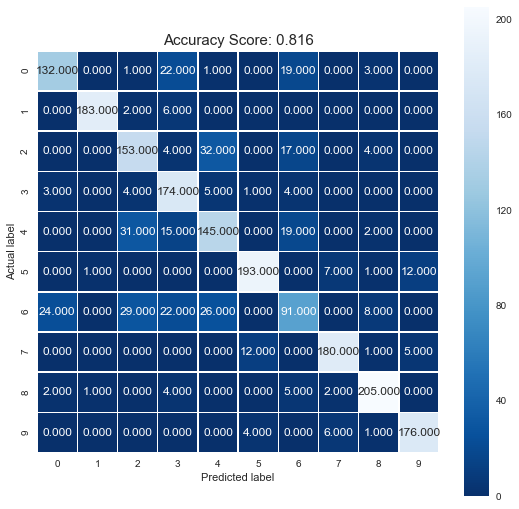

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, preds_test)
#cm = metrics.confusion_matrix(y_train, preds)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_test)
plt.title(all_sample_title, size = 15);



In [15]:
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
np.mean(recall)
np.mean(precision)

0.8166426271992595

0.8155002382517814

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Using Gaussian Naive Bayes as alternate classifier

In [ ]:
y.shape

In [ ]:
from sklearn.naive_bayes import GaussianNB


# Trying with train
gnb = GaussianNB().fit(X,y)
gnb_pred = gnb.predict(X_validate)

gnb_accuracy = gnb.score(X_validate,y_validate)
print(gnb_accuracy)

